In [1]:
from imdbpie import ImdbFacade
from imdbpie import Imdb
import pandas as pd
import numpy as np
import plotly.graph_objects as go
import tqdm
import time
import pickle
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
import matplotlib.pyplot as plt
from PIL import Image

In [2]:
client = Imdb(locale='en_US')
imdb = ImdbFacade(client=client)

In [3]:
brad = imdb.get_name(imdb.search_for_name('Brad Pitt')[0].imdb_id)
len(brad.filmography)

473

In [4]:
leo = imdb.get_name(imdb.search_for_name('Leonardo DiCaprio')[0].imdb_id)
len(leo.filmography)

431

In [5]:
matt = imdb.get_name(imdb.search_for_name('Matt Damon')[0].imdb_id)
len(matt.filmography)

475

In [7]:
interest_list = [
 'genres',
 'plot_outline',
 'rating',
 'rating_count',
 'runtime',
 'stars',
 'title',
 'year']

def film_to_dict(film):
    temp = {x:getattr(film, x) for x in interest_list}
    return temp

In [59]:
# brad_films_dict = {}
# for film_id in tqdm.tqdm(brad.filmography):
#     film = imdb.get_title(imdb_id=film_id)
#     time.sleep(2)
#     brad_films_dict[film_id]=film_to_dict(film)

100%|██████████████████████████████████████████████████████████████████████████████| 473/473 [1:11:48<00:00, 11.79s/it]


In [60]:
with open('brad.pkl','wb') as f:
    pickle.dump(brad_films_dict, f)

In [6]:
with open('brad.pkl','rb') as f:
    brad_films_dict = pickle.load(f)

In [13]:
# leo_films_dict = {}
# for film_id in tqdm.tqdm(leo.filmography):
#     try:
#         film = imdb.get_title(imdb_id=film_id)
#     except:
#         continue
#     time.sleep(1)
#     leo_films_dict[film_id]=film_to_dict(film)
    
# with open('leo.pkl','wb') as f:
#     pickle.dump(leo_films_dict, f)

100%|████████████████████████████████████████████████████████████████████████████████| 431/431 [58:42<00:00,  8.06s/it]


In [7]:
with open('leo.pkl','rb') as f:
    leo_films_dict = pickle.load(f)

In [8]:
len(leo_films_dict)

397

In [11]:
# matt_films_dict = {}
# for film_id in tqdm.tqdm(matt.filmography):
#     try:
#         film = imdb.get_title(imdb_id=film_id)
#     except:
#         continue
#     time.sleep(1)
#     matt_films_dict[film_id]=film_to_dict(film)
    
# with open('matt.pkl','wb') as f:
#     pickle.dump(matt_films_dict, f)

100%|██████████████████████████████████████████████████████████████████████████████| 475/475 [1:07:21<00:00,  9.11s/it]


In [9]:
with open('matt.pkl','rb') as f:
    matt_films_dict = pickle.load(f)

In [10]:
len(matt_films_dict)

439

## Word Cloud

In [18]:
matt_films_dict[list(matt_films_dict.keys())[0]]

{'genres': ('comedy', 'drama'),
 'plot_outline': 'Follows the life of John R. Brinkley, a real-life 20th century doctor who conned his patients into thinking that he had discovered the cure to impotence. Based on the book by Pope Brock.',
 'rating': None,
 'rating_count': 0,
 'runtime': None,
 'stars': (TitleName(name='Matt Damon', category='actor', imdb_id='nm0000354', job=None, characters=('John R. Brinkley',)),),
 'title': 'Charlatan',
 'year': None}

In [16]:
def extract_outline_text(films_dict):
    text=''
    for k in films_dict:
        outline = str(films_dict[k]['plot_outline'])
        outline = ' '.join(outline.split())
        text += outline
    return text.lower()

In [48]:
temp = extract_outline_text(leo_films_dict)
stopwords = list(STOPWORDS)
stopwords+=['film', 'show', 'new', 'movie', 'hollywood', 'interview','year', 'actor']

In [57]:
wordcloud = WordCloud(background_color="white",width=1000, height=860, margin=2, stopwords=stopwords, min_font_size=15, max_font_size=120).generate(temp)

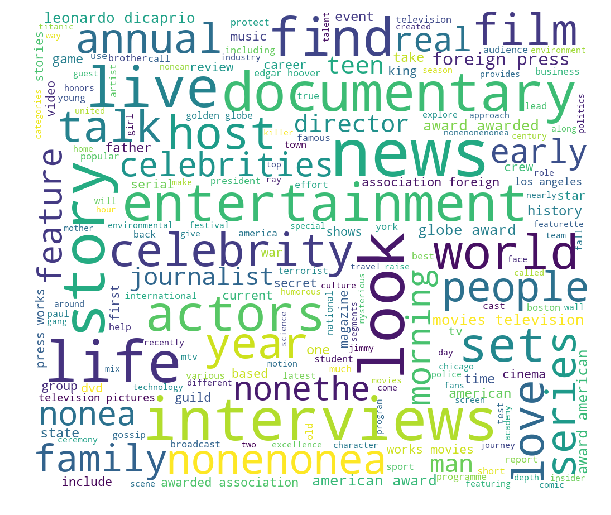

In [58]:
plt.figure(figsize = (10,10))
plt.imshow(wordcloud)
plt.axis("off")
plt.show()

## Interactive Bubble Chart

In [84]:
fig = go.Figure()
year = []
rating = []
count = []
threshold = 40000
for film_id, data in brad_films_dict.items():
    if data['year'] == None or data['rating'] == None or data['rating_count']<=threshold:
        continue
    year.append(data['year'])
    rating.append(data['rating'])
    count.append(data['rating_count'])
    
fig.add_trace(go.Scatter(
    x=year, y=rating,
    name='Brad Pitt',
    marker_size=count
    ))

year = []
rating = []
count = []
for film_id, data in leo_films_dict.items():
    if data['year'] == None or data['rating'] == None or data['rating_count']<=threshold:
        continue
    year.append(data['year'])
    rating.append(data['rating'])
    count.append(data['rating_count'])
    
fig.add_trace(go.Scatter(
    x=year, y=rating,
    name='Leonardo DiCaprio',
    marker_size=count
    ))

year = []
rating = []
count = []
for film_id, data in matt_films_dict.items():
    if data['year'] == None or data['rating'] == None or data['rating_count']<=threshold:
        continue
    year.append(data['year'])
    rating.append(data['rating'])
    count.append(data['rating_count'])
    
fig.add_trace(go.Scatter(
    x=year, y=rating,
    name='Matt Damon',
    marker_size=count
    ))

sizeref = 3*max(count)/(100**2)

fig.update_traces(mode='markers', marker=dict(sizemode='area',
                                              sizeref=sizeref, line_width=2))

fig.update_layout(
    title='Ratings Comparison among Brad Pitt, Leonardo Dicaprio, Matt Damon (Interactive Plot)',
    xaxis=dict(
        title='Year',
        gridcolor='white',
        gridwidth=2,
    ),
    yaxis=dict(
        title='Ratings (1-10)',
        gridcolor='white',
        gridwidth=2,
    ),
    paper_bgcolor='rgb(243, 243, 243)',
    plot_bgcolor='rgb(243, 243, 243)',
)

fig.show()

## Radar Chart

In [87]:
from collections import defaultdict

In [99]:
brad_genre = defaultdict(list)
for film_id, data in brad_films_dict.items():
    if data['rating'] == None or len(data['genres'])<1:
        continue
    for g in data['genres']:
        brad_genre[g].append(data['rating'])

sorted(brad_genre, key=lambda k: len(temp_dict[k]), reverse=True)

['documentary',
 'comedy',
 'short',
 'drama',
 'talk-show',
 'news',
 'thriller',
 'music',
 'action',
 'adventure',
 'romance',
 'biography',
 'crime',
 'family',
 'mystery',
 'sci-fi',
 'history',
 'fantasy',
 'sport',
 'reality-tv',
 'war',
 'animation',
 'western',
 'game-show',
 'horror',
 'musical']

In [100]:
leo_genre = defaultdict(list)
for film_id, data in leo_films_dict.items():
    if data['rating'] == None or len(data['genres'])<1:
        continue
    for g in data['genres']:
        leo_genre[g].append(data['rating'])

sorted(leo_genre, key=lambda k: len(temp_dict[k]), reverse=True)

['documentary',
 'comedy',
 'short',
 'drama',
 'talk-show',
 'news',
 'thriller',
 'music',
 'action',
 'adventure',
 'romance',
 'biography',
 'crime',
 'family',
 'mystery',
 'sci-fi',
 'history',
 'fantasy',
 'sport',
 'reality-tv',
 'animation',
 'war',
 'game-show',
 'western',
 'horror']

In [101]:
matt_genre = defaultdict(list)
for film_id, data in matt_films_dict.items():
    if data['rating'] == None or len(data['genres'])<1:
        continue
    for g in data['genres']:
        matt_genre[g].append(data['rating'])

sorted(matt_genre, key=lambda k: len(temp_dict[k]), reverse=True)

['documentary',
 'comedy',
 'short',
 'drama',
 'talk-show',
 'news',
 'thriller',
 'music',
 'action',
 'adventure',
 'biography',
 'crime',
 'romance',
 'family',
 'mystery',
 'sci-fi',
 'history',
 'fantasy',
 'sport',
 'reality-tv',
 'war',
 'animation',
 'western',
 'game-show',
 'horror',
 'musical']

#### From the genres about, we will compare their performances in the genres: 'documentary',  'news',  'talk-show',  'comedy',  'drama', 'short'.

In [111]:
genres = ['documentary', 'news', 'talk-show', 'comedy', 'drama', 'short']
fig = go.Figure()
fig.add_trace(go.Scatterpolar(
      r=[np.mean(brad_genre[g]) for g in genres],
      theta=genres,
      fill='toself',
      name='Brad Pitt'
))

fig.add_trace(go.Scatterpolar(
      r=[np.mean(leo_genre[g]) for g in genres],
      theta=genres,
      fill='toself',
      name='Leonardo DiCaprio'
))

fig.add_trace(go.Scatterpolar(
      r=[np.mean(matt_genre[g]) for g in genres],
      theta=genres,
      fill='toself',
      name='Matt Damon'
))

fig.update_layout(
    title='Average Ratings in Different Genres',
    polar=dict(
        radialaxis=dict(
            visible=True,
            range=[0, 8]
        )),
    showlegend=True,
    paper_bgcolor='rgb(243, 243, 243)',
    plot_bgcolor='rgb(243, 243, 243)',
)